In [1]:
import os
print(os.getcwd())

C:\Users\Riccardo\Desktop\DWM


In [2]:
import pandas as pd 
data = pd.read_csv("train.csv")
data.head(100)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt2569398,ru,Со мною вот что происходит,"December, 31st. Impossible Moscow traffic, an ...",0.181963,...,12/9/12,72.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,And Here's What's Happening to Me,NaN,"[{'cast_id': 4, 'character': 'Artyom', 'credit...","[{'credit_id': '52fe4b199251416c910cfbd9', 'de...",14353
96,97,NaN,2500000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt1683921,fr,Nuit Blanche,Vincent is a crooked cop whose drug heist goes...,2.942355,...,11/14/11,98.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Sleepless Night,NaN,"[{'cast_id': 1, 'character': 'Vincent', 'credi...","[{'credit_id': '52fe49c0c3a368484e13dc9b', 'de...",3358
97,98,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,tt1772980,ru,Mishen,"In the year 2020, a group of wealthy Moscovite...",1.042112,...,6/26/11,158.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,NaN,Target,NaN,"[{'cast_id': 1001, 'character': 'Victor', 'cre...","[{'credit_id': '58cdbad4c3a36850e9011085', 'de...",73000
98,99,NaN,10500000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,tt1764625,es,Las aventuras de Tadeo Jones,Tad is a celebrity archeologist and adventurer...,11.003515,...,8/31/12,90.0,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,"No whip, no gun...All fun!","Tad, the Lost Explorer","[{'id': 720, 'name

In [5]:
print("data.shape:", data.shape)
print("data.index:", data.index)
print("data.columns:", data.columns)

data.shape: (3000, 23)
data.index: RangeIndex(start=0, stop=3000, step=1)
data.columns: Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')


In [6]:
data.drop(['homepage'],axis=1,inplace=True)

In [7]:
data["production_companies"]

0       [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1             [{'name': 'Walt Disney Pictures', 'id': 2}]
2       [{'name': 'Bold Films', 'id': 2266}, {'name': ...
3                                                     NaN
4                                                     NaN
                              ...                        
2995    [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
2996    [{'name': 'Memfis Film', 'id': 321}, {'name': ...
2997    [{'name': 'New Line Cinema', 'id': 12}, {'name...
2998    [{'name': 'Jersey Films', 'id': 216}, {'name':...
2999    [{'name': 'Lions Gate Films', 'id': 35}, {'nam...
Name: production_companies, Length: 3000, dtype: object

### data["genres"]

In [8]:
data.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [9]:
def convertAll():
    import math
    i=0
    n_elem = data.shape[0]
    while i<n_elem:
        if isinstance(data["genres"][i], float):
            if math.isnan(data["genres"][i]):
                i+=1
                continue
        data["genres"][i]=eval(data["genres"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["production_countries"][i], float):
            if math.isnan(data["production_countries"][i]):
                i+=1
                continue
        data["production_countries"][i]=eval(data["production_countries"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["spoken_languages"][i], float):
            if math.isnan(data["spoken_languages"][i]):
                i+=1
                continue
        data["spoken_languages"][i]=eval(data["spoken_languages"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["Keywords"][i], float):
            if math.isnan(data["Keywords"][i]):
                i+=1
                continue
        data["Keywords"][i]=eval(data["Keywords"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["cast"][i], float):
            if math.isnan(data["cast"][i]):
                i+=1
                continue
        data["cast"][i]=eval(data["cast"][i]) 
        i+=1

    i=0
    while i<n_elem:
        if isinstance(data["crew"][i], float):
            if math.isnan(data["crew"][i]):
                i+=1
                continue
        data["crew"][i]=eval(data["crew"][i]) 
        i+=1

    i=0
    while i<n_elem:
        if isinstance(data["production_companies"][i], float):
            if math.isnan(data["production_companies"][i]):
                i+=1
                continue
        data["production_companies"][i]=eval(data["production_companies"][i])
        i+=1


In [10]:
convertAll()

<ipython-input-9-183aa8536cce>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["genres"][i]=eval(data["genres"][i])
<ipython-input-9-183aa8536cce>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["production_countries"][i]=eval(data["production_countries"][i])
<ipython-input-9-183aa8536cce>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["spoken_languages"][i]=eval(data["spoken_languages"][i])
<ipython-input-9-183aa

In [5]:
def get_words (data):
    import math
    descrizioni = []
    i=0
    while i<1000:
        if isinstance(data["overview"][i], float):
            if math.isnan(data["overview"][i]):
                empty_list=[]
                descrizioni += empty_list
                i+=1
                continue
        desc = data["overview"][i]         # this is a string
        words = desc.split() # this is a list
        words = set(words)     # create a set
        descrizioni += [words] # append words to the list
        i=i+1
    return descrizioni

In [4]:
lyrics_word_split = get_words(data)

print ( lyrics_word_split[3] )

{'when', 'him,', 'herself', 'end', 'the', '-', 'convince', 'child', 'not', 'she', 'Seven', 'Vidya', 'cost', 'city', 'truth', 'it', 'nothing', 'alone', 'to', 'everyone', 'does', 'of', 'a', 'Arnab', 'seem', 'except', 'seems.', 'at', 'With', 'about', 'missing', 'dead', 'what', 'Balan)', 'London', 'begins', 'memories', 'unravel', 'is', 'arrives', 'life.', 'soaked', 'rely', 'In', 'relentless', 'unborn', 'exist.', 'clues', 'reach', 'even', 'festive', 'her', 'husband.', 'on', 'determined', 'and', 'husband', '(Vidya', 'find', 'tries', 'own', 'Bagchi.', 'in', 'Bagchi', 'all', 'realises', 'search', 'slowly', 'months', 'for', 'She', 'Kolkata', 'from', 'lies,', 'fragments', 'that', 'pregnant', 'city,'}


In [6]:
def jaccard(a,b):
    return len(a & b) / len( a | b)

In [7]:
jaccard(lyrics_word_split[0],lyrics_word_split[123])

0.06896551724137931

In [8]:
def most_similar_jaccard(film_ricerca, lyrics_word_split):
    most_similar_id=1
    jaccard_most_similar=jaccard(lyrics_word_split[film_ricerca],lyrics_word_split[2])
    list_size=len(lyrics_word_split)
    current_id=2
    while current_id<list_size:
        current_sim=jaccard(lyrics_word_split[film_ricerca],lyrics_word_split[current_id])
        if current_sim>jaccard_most_similar:
            jaccard_most_similar=current_sim
            most_similar_id=current_id
        current_id=current_id+1
    
    return most_similar_id, jaccard_most_similar

sim_id, sim_value = most_similar_jaccard(0, lyrics_word_split)

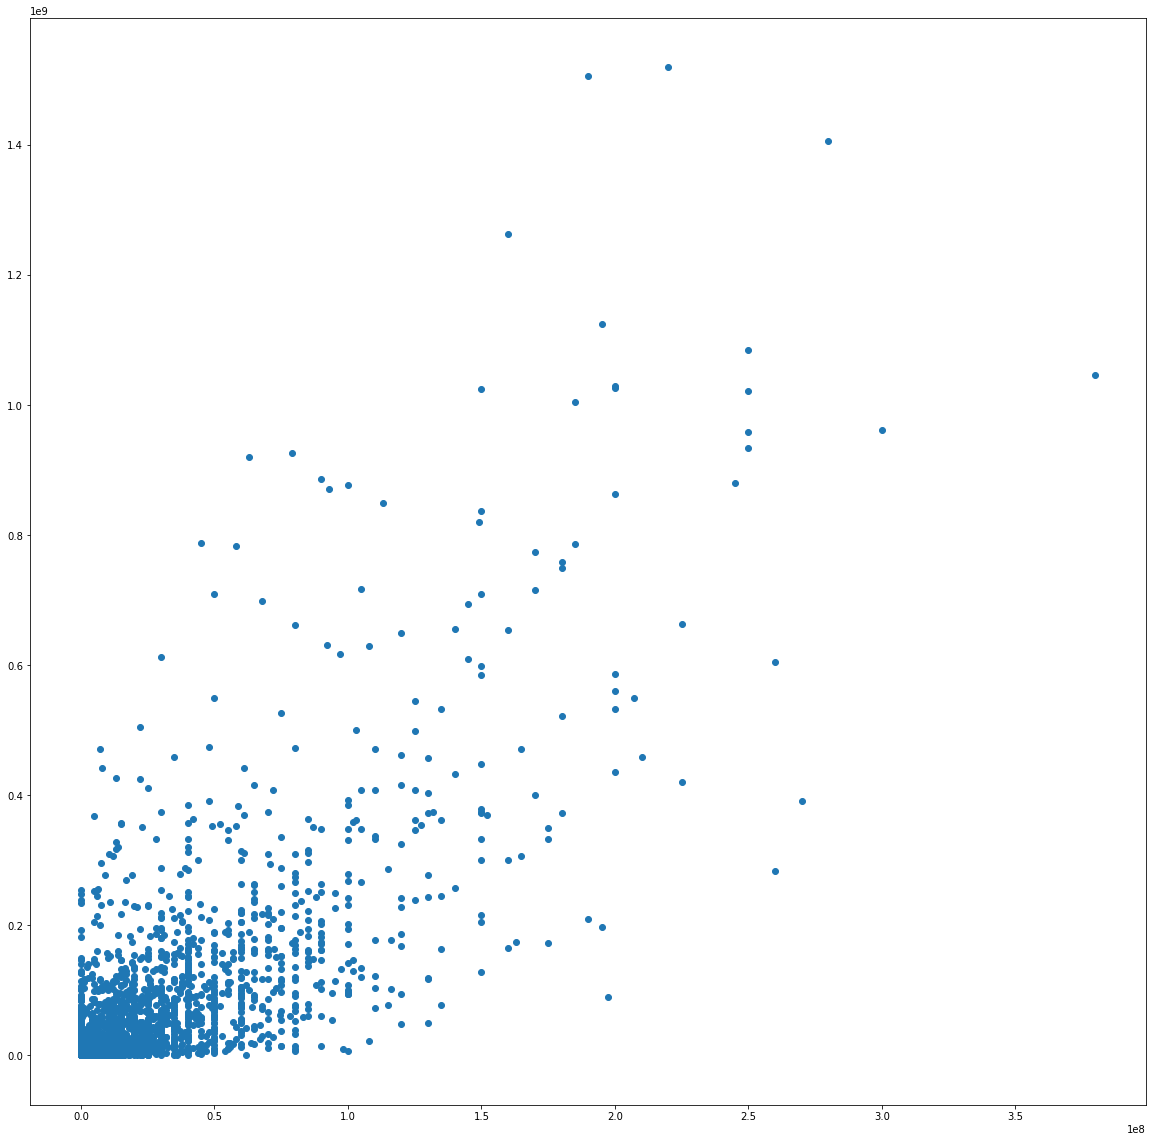

In [24]:
# plot film with revenue on X and budget on Y. There are budget's row with 0 value.
%matplotlib inline 
import matplotlib.pyplot as plt
# use the following for more interactive plots
# %matplotlib inline 

import numpy as np
fig, ax = plt.subplots(figsize=(20,20))

#https://stackoverflow.com/questions/31593201/how-are-iloc-and-loc-different
ax.scatter(data.iloc[:, 2], data.iloc[:, 22])

In [15]:
data.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(data.iloc[:, 1:3])
data.iloc[:, 1:3] = imputer.transform(data.iloc[:, 1:3])

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: "[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]"

data_with_budget.shape: (2188, 23)


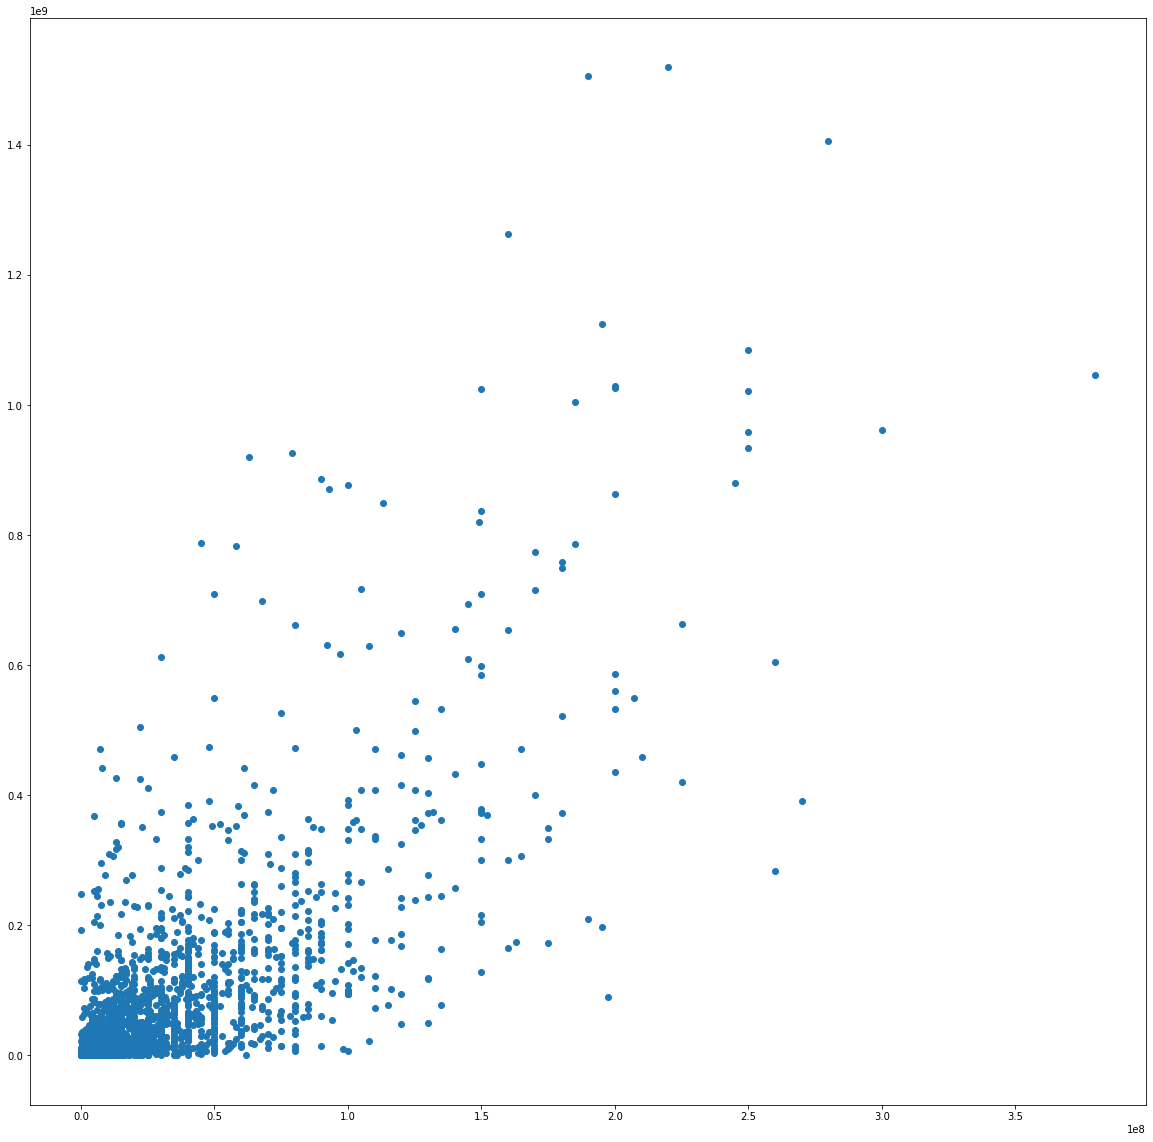

In [35]:
data_with_budget = data[data["budget"] != 0]
print("data_with_budget.shape:", data_with_budget.shape)
sum(data_with_budget['budget'] == 0)

fig, ax = plt.subplots(figsize=(20,20))

ax.scatter(data_with_budget.iloc[:, 2], data_with_budget.iloc[:, 22])

In [46]:
sum(data_with_budget['revenue'] <= 10000000)

666

In [58]:
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#matrix budget-revenue
matrice = [len(data_with_budget)][2]
br = [data_with_budget['budget'], data_with_budget['revenue']]

k_means = KMeans(n_clusters=5, n_init=1)
k_means.fit(br)


fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(br.iloc[0, :], br.iloc[1, :], c=k_means.labels_)

IndexError: list index out of range